In [3]:
import re
from datasets import load_dataset

In [2]:
dataset = load_dataset("ai4bharat/IndicCorpV2", "indiccorp_v2", split="hin_Deva", streaming=True)

for i, example in enumerate(dataset):
    print(example)
    if i == 5:
        break


{'text': 'लोगों को बिलों संबंधी सुविधा देना ही उनका काम'}
{'text': ''}
{'text': 'इनेलो 1987 में उस वक्त ऐसे ही दोराहे पर खड़ी थी, जब पूर्व उपप्रधानमंत्री देवीलाल ने अपने पुत्र ओमप्रकाश चौटाला को अपना राजनीतिक उत्तराधिकारी घोषित किया था। हालांकि तब पार्टी पर देवीलाल की मजबूत पकड़ के चलते पार्टी टूटने से बच गई थी। 1989 में देवीलाल केन्द्र की राजनीति में सक्रिय हो गए थे और उनके उपप्रधानमंत्री बनने के पश्चात् उनके तीन बेटों जगदीश सिंह, रणजीत सिंह और ओमप्रकाश चौटाला में से रणजीत और ओमप्रकाश के बीच हरियाणा में उनकी राजनीतिक विरासत को लेकर जंग शुरू हो गई थी। उन परिस्थितियों में देवीलाल ने कड़ा निर्णय लेते हुए पार्टी की बागडोर ओमप्रकाश चौटाला के हवाले कर दी थी, जिसके बाद रणजीत की बगावत का असर पार्टी, संगठन और उनकी सरकार पर भी पड़ा था। उस समय रणजीत की नाराजगी के चलते उनके समर्थन में कई कैबिनेट मंत्रियों ने इस्तीफे दे दिए थे किन्तु तब पार्टी सुप्रीमो चौ. देवीलाल की हरियाणा की जनता पर इतनी मजबूत पकड़ थी कि ओमप्रकाश चौटाला को उत्तराधिकारी बनाने के उनके फैसले का जनता के बीच कोई खास विरोध नहीं हुआ थ

In [3]:
data = []
for i, example in enumerate(dataset):
    # because there were alternate empyt rows in loaded dataset
    if(i%2==1):
        continue
    data.append(example["text"])
    if i >= 20:
        break

In [4]:
len(data[1].split(" "))

231

In [16]:
def sentence_tokenizer(data):
    sentences = []
    for d in data:
        sentences.extend(re.split(r"(?<=[.।?])\s+",d))
    return sentences

In [62]:
def sentence_count(data):
    cnt = 0
    for d in data:
        cnt += len(re.split(r"(?<=[.।?])\s+",d))

    return cnt


In [63]:
sentence_count(data)

29

In [17]:
sent = sentence_tokenizer(data)
print(sent)

['लोगों को बिलों संबंधी सुविधा देना ही उनका काम', 'इनेलो 1987 में उस वक्त ऐसे ही दोराहे पर खड़ी थी, जब पूर्व उपप्रधानमंत्री देवीलाल ने अपने पुत्र ओमप्रकाश चौटाला को अपना राजनीतिक उत्तराधिकारी घोषित किया था।', 'हालांकि तब पार्टी पर देवीलाल की मजबूत पकड़ के चलते पार्टी टूटने से बच गई थी।', '1989 में देवीलाल केन्द्र की राजनीति में सक्रिय हो गए थे और उनके उपप्रधानमंत्री बनने के पश्चात् उनके तीन बेटों जगदीश सिंह, रणजीत सिंह और ओमप्रकाश चौटाला में से रणजीत और ओमप्रकाश के बीच हरियाणा में उनकी राजनीतिक विरासत को लेकर जंग शुरू हो गई थी।', 'उन परिस्थितियों में देवीलाल ने कड़ा निर्णय लेते हुए पार्टी की बागडोर ओमप्रकाश चौटाला के हवाले कर दी थी, जिसके बाद रणजीत की बगावत का असर पार्टी, संगठन और उनकी सरकार पर भी पड़ा था।', 'उस समय रणजीत की नाराजगी के चलते उनके समर्थन में कई कैबिनेट मंत्रियों ने इस्तीफे दे दिए थे किन्तु तब पार्टी सुप्रीमो चौ.', 'देवीलाल की हरियाणा की जनता पर इतनी मजबूत पकड़ थी कि ओमप्रकाश चौटाला को उत्तराधिकारी बनाने के उनके फैसले का जनता के बीच कोई खास विरोध नहीं हुआ था लेकिन आज स्थि

In [46]:

def word_tokenizer(data):
    words = []

    # Define patterns
    email_pattern = r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}'
    url_pattern = r'https?://[^\s]+|www\.[^\s]+'
    time_pattern = r'\d{1,2}\.\d{2}'  # 10.30
    number_pattern = r'[\d\u0966-\u096F]+'

    # Hindi and English words
    word_pattern = r'[\u0900-\u097F]+|[a-zA-Z]+'
    
    # Hindi + English punctuation, including danda (।)
    punc_pattern = r'[।.,!?;:()\'"“”‘’—–\-]'

    
    # Combine with priority: time first, then emails/URLs
    combined_pattern = f'{punc_pattern}|{time_pattern}|{email_pattern}|{url_pattern}|{word_pattern}|{number_pattern}'

    for sentence in data:
        tokens = re.findall(combined_pattern, sentence)
        words.extend(tokens)

    return words


In [72]:

def word_count(data):
    cnt = 0

    # Define patterns
    email_pattern = r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}'
    url_pattern = r'https?://[^\s]+|www\.[^\s]+'
    time_pattern = r'\d{1,2}\.\d{2}'  # 10.30
    number_pattern = r'[\d\u0966-\u096F]+'

    # Hindi and English words
    word_pattern = r'[\u0900-\u097F]+|[a-zA-Z]+'
    
    # Hindi + English punctuation, including danda (।)
    punc_pattern = r'[।.,!?;:()\'"“”‘’—–\-]'

    
    # Combine with priority: time first, then emails/URLs
    combined_pattern = f'{punc_pattern}|{time_pattern}|{email_pattern}|{url_pattern}|{word_pattern}|{number_pattern}'

    for sentence in data:
        tokens = re.findall(combined_pattern, sentence)
        cnt += len(tokens)

    return cnt


In [73]:
word_count(data)

661

In [4]:

def character_count(data):
    cnt = 0

    # Define patterns
    email_pattern = r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}'
    url_pattern = r'https?://[^\s]+|www\.[^\s]+'
    time_pattern = r'\d{1,2}\.\d{2}'  # 10.30
    number_pattern = r'[\d\u0966-\u096F]+'

    # Hindi and English words
    word_pattern = r'[\u0900-\u097F]+|[a-zA-Z]+'
    
    # Hindi + English punctuation, including danda (।)
    punc_pattern = r'[।.,!?;:()\'"“”‘’—–\-]'

    
    # Combine with priority: time first, then emails/URLs
    combined_pattern = f'{punc_pattern}|{time_pattern}|{email_pattern}|{url_pattern}|{word_pattern}|{number_pattern}'

    for sentence in data:
        tokens = re.findall(combined_pattern, sentence)
        for char in tokens:
            cnt += len(char)

    return cnt


In [61]:
character_count(data)

2630

In [64]:
def avg_sentence_len(data):
    return word_count(data)/sentence_count(data)

In [65]:
avg_len_sentences(data)

90.6896551724138

In [75]:
def avg_word_len(data):
    return character_count(data)/word_count(data)

In [76]:
avg_word_len(data)

3.9788199697428137

In [77]:
def TTR_word(data):
    uniquecnt = len(set(word_tokenizer(data)))

    return uniquecnt/word_count(data)

In [78]:
TTR_word(data)

0.556732223903177

In [13]:


class TextStreamAnalyzer:
    def __init__(self, dataset_name="ai4bharat/IndicCorpV2", config="indiccorp_v2", split="hin_Deva"):
        self.dataset = load_dataset(dataset_name, config, split=split, streaming=True)

    def clean_text_stream(self, max_items=None):
        data = []
        for i, example in enumerate(self.dataset):
            if i % 2 == 1:
                continue
            data.append(example["text"])
            if max_items and i >= max_items:
                break
        return data

    def sentence_tokenizer(self, data):
        sentences = []
        for d in data:
            sentences.extend(re.split(r"(?<=[.।!?])\s+", d))
        return sentences

    def sentence_count(self, data):
        """
        Counts total number of sentences in the given data.
        """
        count = 0
        for d in data:
            count += len(re.split(r"(?<=[.।!?])\s+", d))
        return count

    
    def word_tokenizer(self,data):
        words = []
    
        # Define patterns
        email_pattern = r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}'
        url_pattern = r'https?://[^\s]+|www\.[^\s]+.^\s{2,}'
        time_pattern = r'\d{1,2}\.\d{2}'  # 10.30
        year_pattern = r'^(?:०[१-९]|[१२][०-९]|३[०-१])[./-](?:०[१-९]|१[०-२])[./-](?:१९|२०)[०-९]{2}$'
        number_pattern = r'[\d\u0966-\u096F]+'
    
        # Hindi and English words
        word_pattern = r'[\u0900-\u097F]+|[a-zA-Z]+'
        
        # Hindi + English punctuation, including danda (।)
        punc_pattern = r'[।.,!?;:()\'"“”‘’—–\-]'
    
        
        # Combine with priority: time first, then emails/URLs
        combined_pattern = f'{punc_pattern}|{time_pattern}|{email_pattern}|{url_pattern}|{word_pattern}|{number_pattern}|{year_pattern}'
    
        for sentence in data:
            tokens = re.findall(combined_pattern, sentence)
            words.extend(tokens)
    
        return words

    

    
    def word_count(self,data):
        cnt = 0
    
        # Define patterns
        email_pattern = r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}'
        url_pattern = r'https?://[^\s]+|www\.[^\s]+'
        time_pattern = r'\d{1,2}\.\d{2}'  # 10.30
        year_pattern = r'^(?:०[१-९]|[१२][०-९]|३[०-१])[./-](?:०[१-९]|१[०-२])[./-](?:१९|२०)[०-९]{2}$'
        number_pattern = r'[\d\u0966-\u096F]+'
    
        # Hindi and English words
        word_pattern = r'[\u0900-\u097F]+|[a-zA-Z]+'
        
        # Hindi + English punctuation, including danda (।)
        punc_pattern = r'[।.,!?;:()\'"“”‘’—–\-]'
    
        
        # Combine with priority: time first, then emails/URLs
        combined_pattern = f'{punc_pattern}|{time_pattern}|{email_pattern}|{url_pattern}|{word_pattern}|{number_pattern}|{year_pattern}'
    
        for sentence in data:
            tokens = re.findall(combined_pattern, sentence)
            cnt += len(tokens)

        return cnt

    
    def character_count(self,data):
        cnt = 0
    
        # Define patterns
        email_pattern = r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}'
        url_pattern = r'https?://[^\s]+|www\.[^\s]+'
        time_pattern = r'\d{1,2}\.\d{2}'  # 10.30
        number_pattern = r'[\d\u0966-\u096F]+'
    
        # Hindi and English words
        word_pattern = r'[\u0900-\u097F]+|[a-zA-Z]+'
        
        # Hindi + English punctuation, including danda (।)
        punc_pattern = r'[।.,!?;:()\'"“”‘’—–\-]'
    
        
        # Combine with priority: time first, then emails/URLs
        combined_pattern = f'{punc_pattern}|{time_pattern}|{email_pattern}|{url_pattern}|{word_pattern}|{number_pattern}'
    
        for sentence in data:
            tokens = re.findall(combined_pattern, sentence)
            for char in tokens:
                cnt += len(char)
    
        return cnt

    def avg_sentence_len(self,data):
        return word_count(data)/sentence_count(data)
    def avg_word_len(self,data):
        return character_count(data)/word_count(data)

    def TTR_word(self,data):
        uniquecnt = len(set(word_tokenizer(data)))
        return uniquecnt/word_count(data)

In [6]:
analyzer = TextStreamAnalyzer()

# Stream and collect first 1000 examples
data = analyzer.clean_text_stream(max_items=1000)

# Get sentence and word counts
sentence_total = analyzer.sentence_count(data)
word_total = analyzer.word_count(data)
character_count = analyzer.character_count(data)
print(f"Total Sentences: {sentence_total}")
print(f"Total Words: {word_total}")
print(f"Total Character: {character_count}")

Total Sentences: 1719
Total Words: 33050
Total Character: 126990


In [7]:
analyzer = TextStreamAnalyzer()

# Stream and collect first 10000 examples
data = analyzer.clean_text_stream(max_items=10000)

# Get sentence and word counts
sentence_total = analyzer.sentence_count(data)
word_total = analyzer.word_count(data)
character_count = analyzer.character_count(data)
print(f"Total Sentences: {sentence_total}")
print(f"Total Words: {word_total}")
print(f"Total Character: {character_count}")

Total Sentences: 16213
Total Words: 303710
Total Character: 1170468


In [9]:
analyzer = TextStreamAnalyzer()

# Stream and collect first 100000 examples
data = analyzer.clean_text_stream(max_items=100000)

# Get sentence and word counts
sentence_total = analyzer.sentence_count(data)
word_total = analyzer.word_count(data)
character_count = analyzer.character_count(data)
print(f"Total Sentences: {sentence_total}")
print(f"Total Words: {word_total}")
print(f"Total Character: {character_count}")

Total Sentences: 162745
Total Words: 3060771
Total Character: 11795225


In [10]:
analyzer = TextStreamAnalyzer()

# Stream and collect first 1000000 examples
data = analyzer.clean_text_stream(max_items=1000000)

# Get sentence and word counts
sentence_total = analyzer.sentence_count(data)
word_total = analyzer.word_count(data)
character_count = analyzer.character_count(data)
print(f"Total Sentences: {sentence_total}")
print(f"Total Words: {word_total}")
print(f"Total Character: {character_count}")

Total Sentences: 1629119
Total Words: 30622155
Total Character: 118090265


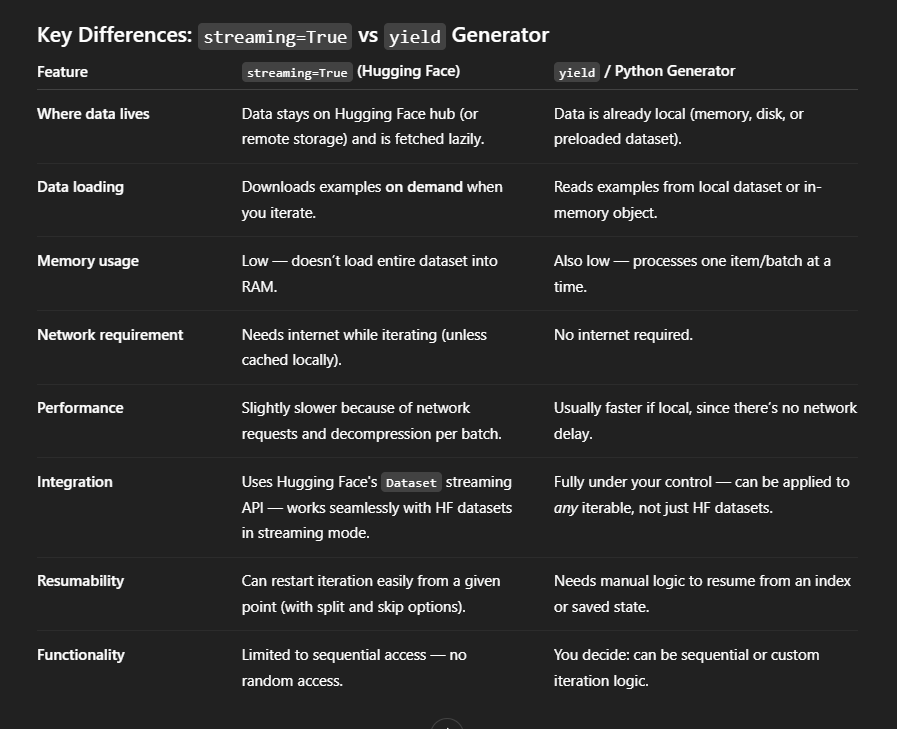

In [12]:
analyzer = TextStreamAnalyzer()

# Stream and collect first 100 examples
data = analyzer.clean_text_stream(max_items=100)

# Get sentence and word counts
sentence_total = analyzer.sentence_tokenizer(data)

for sen in sentence_total:
    print(sen)
    print()

लोगों को बिलों संबंधी सुविधा देना ही उनका काम

इनेलो 1987 में उस वक्त ऐसे ही दोराहे पर खड़ी थी, जब पूर्व उपप्रधानमंत्री देवीलाल ने अपने पुत्र ओमप्रकाश चौटाला को अपना राजनीतिक उत्तराधिकारी घोषित किया था।

हालांकि तब पार्टी पर देवीलाल की मजबूत पकड़ के चलते पार्टी टूटने से बच गई थी।

1989 में देवीलाल केन्द्र की राजनीति में सक्रिय हो गए थे और उनके उपप्रधानमंत्री बनने के पश्चात् उनके तीन बेटों जगदीश सिंह, रणजीत सिंह और ओमप्रकाश चौटाला में से रणजीत और ओमप्रकाश के बीच हरियाणा में उनकी राजनीतिक विरासत को लेकर जंग शुरू हो गई थी।

उन परिस्थितियों में देवीलाल ने कड़ा निर्णय लेते हुए पार्टी की बागडोर ओमप्रकाश चौटाला के हवाले कर दी थी, जिसके बाद रणजीत की बगावत का असर पार्टी, संगठन और उनकी सरकार पर भी पड़ा था।

उस समय रणजीत की नाराजगी के चलते उनके समर्थन में कई कैबिनेट मंत्रियों ने इस्तीफे दे दिए थे किन्तु तब पार्टी सुप्रीमो चौ.

देवीलाल की हरियाणा की जनता पर इतनी मजबूत पकड़ थी कि ओमप्रकाश चौटाला को उत्तराधिकारी बनाने के उनके फैसले का जनता के बीच कोई खास विरोध नहीं हुआ था लेकिन आज स्थिति बिल्कुल विप